<a href="https://colab.research.google.com/github/JaimieOnigkeit/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Jaimie_Onigkeit_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [11]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]


7

In [0]:
def avg(list):
  '''
  fuction to find the average of any length list of numbers
  '''
  n= len(list)
  total = 0
  for item in list:
    total = total + item
  return total/n

In [0]:
def variance(list):
  '''
  function to find the variance of any length list of numbers
  is dependent on avg
  '''
  a = avg(list)
  n = len(list)
  total = 0
  for item in list:
    total = total + ((item-a)**2)
  return total/n


In [0]:
def sd(list):
  '''
  function to find the standard deviation of an length list of numbers
  is dependent on avg and variance
  '''
  v = variance(list)
  return v ** (1/2)

In [0]:
def all_features(list):
  '''
  function to process and print out the results from
  avg, variance, and sd
  '''
  a = avg(list)
  v = variance(list)
  s = sd(list)
  print('The mean for', list, 'is', a, '\n',
        'The variance for', list, 'is', v, '\n',
        'The standard deviation for', list, 'is', s)

In [35]:
#Print out the average, variance, and standard deviation of the given list
all_features(sales)

The mean for [3505, 2400, 3027, 2798, 3700, 3250, 2689] is 3052.714285714286 
 The variance for [3505, 2400, 3027, 2798, 3700, 3250, 2689] is 183761.06122448976 
 The standard deviation for [3505, 2400, 3027, 2798, 3700, 3250, 2689] is 428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [38]:
import numpy as np
import pandas as pd

cust = [127, 80, 105, 92, 120, 115, 93]

#This will create a dataframe that contains both the sales and customer information
d = {'1': sales, '2' : cust}
df = pd.DataFrame(d)

#This will create a variance-covariance matrix for the dataframe
df.cov()

,1,2
1,214387.904762,7604.357143
2,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [187]:
#Assign the covariance to a variable
df_cov = pd.DataFrame(df.cov())

cov = df_cov['1']['2']

cov

7604.357142857142

In [190]:
#Assign the denominator to a variable
#Needed the ddof to get the right answer
denom = np.std(cust, ddof = 1) * np.std(sales, ddof = 1)

denom


7897.890309308459

In [191]:
#Divide the covariance by the denominator
cov/denom

0.9628339778148909

In [155]:
#Python correlation to check my answer
df.corr()

,1,2
1,1.000000,0.962834
2,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [86]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

print(titanic_df.shape)
titanic_df.head()

(1310, 16)


,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [93]:
#The variance-covariance matrix only includes numerical data
titanic_df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
import matplotlib.pyplot as plt


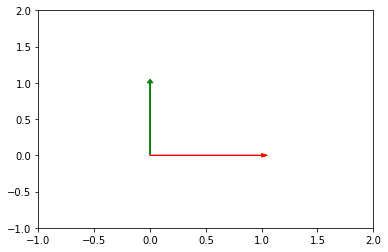

In [98]:
#Orthogonal == Perpendicular

a = [0,1]
b = [1,0]

plt.arrow(0, 0, a[0], a[1], head_width = .05, head_length = .05, color = 'green')
plt.arrow(0, 0, b[0], b[1], head_width = .05, head_length = .05, color = 'red')
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.show()



## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [115]:
#If two vectors are orthogonal, their dot product will be zero.
#These two vectors don't meet that criteria, so they are not orthogonal

a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])

np.dot(a, b)

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [112]:
c = np.array([2, -15, 6, 20])

c

array([[  2, -15,   6,  20]])

In [122]:
# The first thing is asking for the square of the norm of the vector

(np.linalg.norm(c)) ** 2

665.0

In [119]:
# Next, the vector is multiplied by itself

c * c

array([[  4, 225,  36, 400]])

In [120]:
#Finally, the vector's transpose is multiplied by the vector

(c.T) * c

array([[   4,  -30,   12,   40],
       [ -30,  225,  -90, -300],
       [  12,  -90,   36,  120],
       [  40, -300,  120,  400]])

The results from the second expression are the diagonal of the results from the third. 

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\0 \end{bmatrix}
 -8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} -8\hat{k}\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [124]:
#First step is to normalize the vector
f = np.array([4, 12, 11, 9, 2])

f_norm = np.linalg.norm(f)

f_norm

19.131126469708992

In [126]:
#Then finish the equation
f_hat = (1/f_norm) *f

f_hat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

I want to make it pretty

\begin{align}
 \hat{f} = \frac{1}{||f||}f = \frac{1}{19.13}\begin{bmatrix} 4 \\ 12 \\  11 \\ 9 \\ 2 \end{bmatrix} = \begin{bmatrix} 0.21 \\ 0.63 \\  0.57 \\ 0.47 \\ 0.10 \end{bmatrix}
\end{align}

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [0]:
from mpl_toolkits.mplot3d import Axes3D

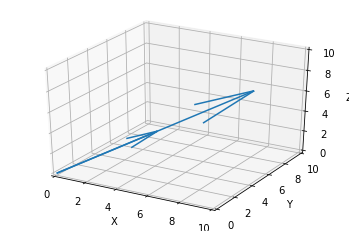

In [133]:
#These two vectors are linearly dependent because one is just the other multiplied by a scalar of 2
R = np.array([3, 6, 2])
S = np.array([6, 12, 4])

vectors = np.array([[0, 0, 0, 3, 6, 2],
                   [0, 0, 0, 6, 12, 4]])
X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_zlim([0, 10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

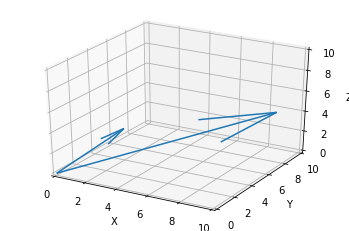

In [136]:
#These two vectors are linearly independent
E = np.array([2, 4, 3])
F = np.array([12, 3, 8])

vectors = np.array([[0, 0, 0, 2, 4, 3],
                   [0, 0, 0, 12, 3, 8]])
X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_zlim([0, 10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
# The two vectors are linearly dependent. h = g * 4
# The span of these vectors is the line they lie on


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [139]:
lmn = np.array([[1, 2, 3],
               [-1, 0, 7],
               [4, 8, 2]])

lmn

array([[ 1,  2,  3],
       [-1,  0,  7],
       [ 4,  8,  2]])

Original

\begin{align}
 lmn = \begin{bmatrix}
  1 & 2 & 3 \\
  -1 & 0 & 7 \\
  4 & 8 & 2 
 \end{bmatrix}
\end{align}

row 2 = row 1 + row 2
\begin{align}
 lmn = \begin{bmatrix}
  1 & 2 & 3 \\
  0 & 2 & 10 \\
  4 & 8 & 2 
 \end{bmatrix}
\end{align}

row 2 * 1/2
\begin{align}
 lmn = \begin{bmatrix}
  1 & 2 & 3 \\
  0 & 1 & 5 \\
  4 & 8 & 2 
 \end{bmatrix}
\end{align}

row 3 * 1/4
\begin{align}
 lmn = \begin{bmatrix}
  1 & 2 & 3 \\
  0 & 1 & 5 \\
  1 & 2 & .5 
 \end{bmatrix}
\end{align}

row 3 = row 3 - row 1
\begin{align}
 lmn = \begin{bmatrix}
  1 & 2 & 3 \\
  0 & 1 & 5 \\
  0 & 0 & -2.5 
 \end{bmatrix}
\end{align}

row 3 * 1/-2.5
\begin{align}
 lmn = \begin{bmatrix}
  1 & 2 & 3 \\
  0 & 1 & 5 \\
  0 & 0 & 1 
 \end{bmatrix}
\end{align}

Therefore, the span of $\{l, m, n\}$ is 3

In [140]:
#I also found this function that gives the rank, which is the same as the span.
np.linalg.matrix_rank(lmn)

3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



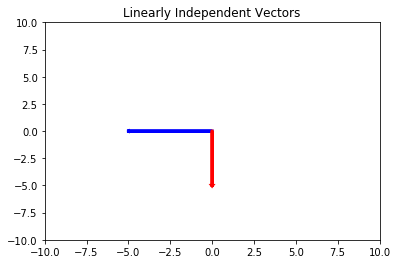

In [197]:
a = [-5, 0] 
b = [0, -5]

plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.xlim(-10, 10)          
plt.ylim(-10, 10)
plt.title("Linearly Independent Vectors")
plt.show()

## 6.2 What does it mean to form a basis?

Vedctors form a basis if they are linearly independent and span a vector space. 

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

This is the same matrix formed in the previous question 5.2.

Please refer to that answer.

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix tells us the dimensions of space that is spanned by it's columns. It's the same as the span of a matrix.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

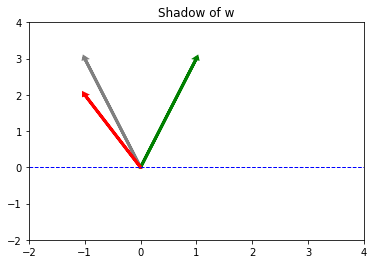

In [198]:
#Apparently this is a stretch goal? I hope so, because I got confused.
v = [1,3] 
w = [-1,2]
proj = [-1, 3]

plt.xlim(-2,4)          
plt.ylim(-2,4)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Shadow of w")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

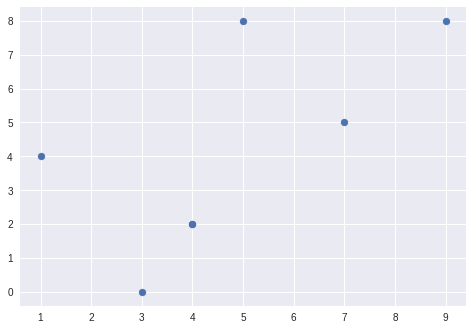

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()